# solution for TABLE 
#### Gourav Khurana 

In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
#read file as data frame 
df=pd.read_excel("D:/Py Programs/FreeLancer/TABLE.xlsx")

In [27]:
df.head()

,reference,flyash,ggbs,CA,Fine aggregate,NaOH,Na2SiO3,Added water,superplasticizer,alkaline ratio,molarity,timecure,temp cure,3day,7day,28day
0,1,360.0,40.0,1209.0,651.0,45.7,114.3,0.0,0.0,2.5,12,900,27,16.615385,27.0,40.0
1,1,320.0,80.0,1209.0,651.0,45.7,114.3,0.0,0.0,2.5,12,900,27,19.076923,31.0,47.0
2,1,360.0,40.0,1209.0,651.0,64.0,96.0,0.0,0.0,1.5,12,900,27,15.384615,25.0,43.0
3,1,320.0,80.0,1209.0,651.0,64.0,96.0,0.0,0.0,1.5,12,900,27,17.846154,29.0,54.0
4,1,400.0,0.0,1209.0,658.0,40.0,100.0,0.0,6.0,2.5,12,900,27,6.769231,11.0,25.0


In [9]:
#check for datatypes 
df.dtypes
#every var is categorical variable 

reference             int64
flyash              float64
ggbs                float64
CA                  float64
Fine aggregate      float64
NaOH                float64
Na2SiO3             float64
Added water         float64
superplasticizer    float64
alkaline ratio      float64
molarity              int64
timecure              int64
temp cure             int64
3day                float64
7day                float64
28day               float64
dtype: object

In [11]:
#check for mssing values 
df.isnull().sum() 
#no missing vlues 

reference           0
flyash              0
ggbs                0
CA                  0
Fine aggregate      0
NaOH                0
Na2SiO3             0
Added water         0
superplasticizer    0
alkaline ratio      0
molarity            0
timecure            0
temp cure           0
3day                0
7day                0
28day               0
dtype: int64

In [15]:
#shape of df 
df.shape

(376, 16)

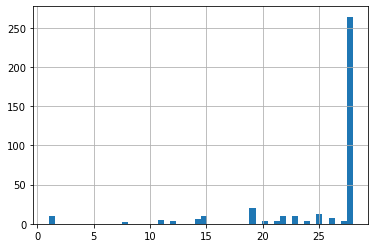

In [19]:
#univariate analysis for 
df['reference'].hist(bins=50)

In [26]:
df['reference'].mode() #we can see 28 is most repeated

0    28
dtype: int64

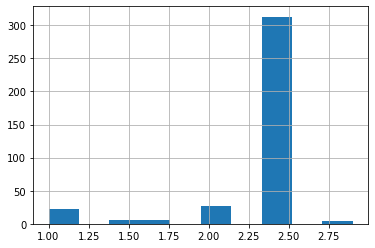

In [28]:
#Univariate analysis of alkaline raio 
df['alkaline ratio'].hist()

As i was told to only predict the mode i will not go much deeper in analysis and will go straight to model prediction 

# Model prediction 

In [31]:
import sklearn
#we font have any categorical var so no need to use dummies 

In [32]:
x=df.drop(['28day','7day','3day'],axis=1)
y1=df['3day']
y2=df['7day']
y3=df['28day']

In [34]:
from sklearn.preprocessing import StandardScaler
mms=StandardScaler()

#### predict 3day 

In [37]:
mms.fit_transform(x,y1)

array([[-4.08316474,  1.47081428, -1.55989721, ...,  1.83021133,
         1.10658122, -0.96035031],
       [-4.08316474,  0.99317262, -1.09273789, ...,  1.83021133,
         1.10658122, -0.96035031],
       [-4.08316474,  1.47081428, -1.55989721, ...,  1.83021133,
         1.10658122, -0.96035031],
       ...,
       [ 0.48961942, -0.26063673,  0.48392483, ..., -0.31693207,
        -0.90144743,  0.97595561],
       [ 0.48961942, -0.20093152,  0.54231975, ..., -0.31693207,
        -0.90144743,  0.97595561],
       [ 0.48961942, -0.14122632,  0.60071466, ..., -0.31693207,
        -0.90144743,  0.97595561]])

In [71]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y1,test_y1=train_test_split(x,y1,random_state=45)

In [106]:
from sklearn.ensemble import RandomForestRegressor 


In [180]:
rfr=RandomForestRegressor(max_depth=10,n_estimators=100)
rfr.fit(train_x,train_y1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [181]:
from sklearn.metrics import r2_score
pred_train = rfr.predict(train_x)
train_score = r2_score(train_y1,pred_train)
pred_test = rfr.predict(test_x)
valid_score1=r2_score(test_y1,pred_test)
print('Train score for 3day:',train_score),print("test score for 3day:",valid_score1)

Train score for 3day: 0.9673435841812471
test score for 3day: 0.7942420664577567


(None, None)

### Better the r-squared better the model so validation score or test score is quite good for 3day

In [182]:


#mean sqare log eror 
from sklearn.metrics import mean_squared_log_error
pred_train = rfr.predict(train_x)
train_score = np.sqrt(mean_squared_log_error(train_y1,pred_train))

pred_test = rfr.predict(test_x)
valid_score=np.sqrt(mean_squared_log_error(test_y1,pred_test))

print('Training score:', train_score)
print('Test score:', valid_score)

Training score: 0.1040123872887761
Test score: 0.17608897213901736


### lower the value of msle better the model

## predict 7day

In [183]:
mms.fit_transform(x,y2)

from sklearn.model_selection import train_test_split
train_x,test_x,train_y2,test_y2=train_test_split(x,y2,random_state=45)

rfr=RandomForestRegressor(max_depth=10,n_estimators=100)
rfr.fit(train_x,train_y2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [184]:
#r -squared
pred_train = rfr.predict(train_x)
train_score = r2_score(train_y2,pred_train)
pred_test = rfr.predict(test_x)
valid_score2=r2_score(test_y2,pred_test)
print('Train score for 7day:',train_score),print("test score for 7day:",valid_score2)

Train score for 7day: 0.9707167516957693
test score for 7day: 0.8452758183332363


(None, None)

#### Better the r2_score  better model

In [185]:
from sklearn.metrics import mean_squared_log_error
pred_train = rfr.predict(train_x)
train_score = np.sqrt(mean_squared_log_error(train_y2,pred_train))

pred_test = rfr.predict(test_x)
valid_score=np.sqrt(mean_squared_log_error(test_y2,pred_test))

print('Training score for 7day:', train_score)
print('Test score for 7 day:', valid_score)

Training score for 7day: 0.09862794388513015
Test score for 7 day: 0.15809936278741504


#### lesser the msle score better the model

# Predict for 28 day

In [186]:
mms.fit_transform(x,y3)

from sklearn.model_selection import train_test_split
train_x,test_x,train_y3,test_y3=train_test_split(x,y3,random_state=45)

rfr=RandomForestRegressor(max_depth=10,n_estimators=100)
rfr.fit(train_x,train_y3)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [187]:
#r -squared
pred_train = rfr.predict(train_x)
train_score = r2_score(train_y3,pred_train)
pred_test = rfr.predict(test_x)
valid_score3=r2_score(test_y3,pred_test)
print('Train score for 28day:',train_score),print("test score for 28day:",valid_score3)

Train score for 28day: 0.9753482843771518
test score for 28day: 0.8632133407791703


(None, None)

#### Better r2 scoree better model 

In [188]:
from sklearn.metrics import mean_squared_log_error
pred_train = rfr.predict(train_x)
train_score = np.sqrt(mean_squared_log_error(train_y3,pred_train))

pred_test = rfr.predict(test_x)
valid_score=np.sqrt(mean_squared_log_error(test_y3,pred_test))

print('Training score for 28 day:', train_score)
print('Test score for 28 day:', valid_score)

Training score for 28 day: 0.09115520296179623
Test score for 28 day: 0.14423317323147794


#### Lower msle better model

## lets comapre the score for 3day ,7day,  28day prediction r2_score

In [237]:
value=[valid_score1,valid_score2,valid_score3]
name=['3day','7day','28day']

In [238]:
df2=pd.DataFrame(index=name,data=value)


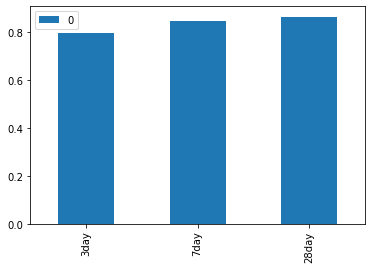

In [239]:
df2.plot(kind='bar')
